In [82]:
import psycopg2
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import rdDepictor, rdMolDraw2D
import mols2grid

opts = Draw.DrawingOptions()
#Draw.SetComicMode(opts)
#print(opts)

In [2]:
sql = "select distinct cs.component_synonym, cmd.chembl_id, cms.synonyms, cms.syn_type, cmd.molecule_type, \
cmd.max_phase, ccs.canonical_smiles, td.chembl_id as \"CHEMBL_Target\", td.pref_name, cas.assay_id, \
cas.chembl_id as \"ChemBL_Assay\", cas.description, caa.standard_value, caa.standard_units \
from public.component_synonyms cs \
join public.component_sequences cl on cl.component_id = cs.component_id \
join public.target_components tc on cl.component_id = tc.component_id \
join public.target_dictionary td on td.tid = tc.tid \
join public.assays cas on cas.tid = td.tid \
join public.activities caa on caa.assay_id = cas.assay_id \
join public.compound_structures ccs on caa.molregno = ccs.molregno \
join public.molecule_dictionary cmd on caa.molregno = cmd.molregno \
left join public.molecule_synonyms cms on cms.molregno = cmd.molregno \
where td.chembl_id in ('CHEMBL1293230', 'CHEMBL4666', 'CHEMBL3351202', 'CHEMBL5668', 'CHEMBL4105924', 'CHEMBL1764941', 'CHEMBL1075129', 'CHEMBL5170', 'CHEMBL2062353', 'CHEMBL4295826', 'CHEMBL2558', 'CHEMBL4225', 'CHEMBL1075281', 'CHEMBL3712854', 'CHEMBL3351215', 'CHEMBL4295662', 'CHEMBL1229011', 'CHEMBL1770036', 'CHEMBL1255131', 'CHEMBL4105771', 'CHEMBL1741191', 'CHEMBL1293296', 'CHEMBL1741187', 'CHEMBL4226', 'CHEMBL1075282', 'CHEMBL4295825', 'CHEMBL4524025', 'CHEMBL4105760', 'CHEMBL4295647', 'CHEMBL4295669', 'CHEMBL1293317', 'CHEMBL2159', 'CHEMBL1932893', 'CHEMBL4105795', 'CHEMBL4523238', 'CHEMBL3663', 'CHEMBL4830', 'CHEMBL3407323', 'CHEMBL4295793', 'CHEMBL4105862', 'CHEMBL4295813', 'CHEMBL4295820', 'CHEMBL3642', 'CHEMBL4105832', 'CHEMBL3751651', 'CHEMBL2010634', 'CHEMBL4295562', 'CHEMBL3329082', 'CHEMBL3879840', 'CHEMBL2185', 'CHEMBL1075275', 'CHEMBL4295873', 'CHEMBL6032', 'CHEMBL2169718', 'CHEMBL2366484', 'CHEMBL4296005', 'CHEMBL4295748', 'CHEMBL2021753', 'CHEMBL2176796', 'CHEMBL2062350', 'CHEMBL4105703', 'CHEMBL4295879', 'CHEMBL4105899', 'CHEMBL4523292', 'CHEMBL4224', 'CHEMBL1075280', 'CHEMBL1741172', 'CHEMBL2085', 'CHEMBL1926491', 'CHEMBL4524037', 'CHEMBL5460', 'CHEMBL4418', 'CHEMBL5203', 'CHEMBL3163', 'CHEMBL4105952', 'CHEMBL3751650', 'CHEMBL2176808', 'CHEMBL2010624', 'CHEMBL1293235', 'CHEMBL4105782', 'CHEMBL1075145', 'CHEMBL3988606', 'CHEMBL3879858', 'CHEMBL1764938', 'CHEMBL3308972', 'CHEMBL4295544', 'CHEMBL4295992', 'CHEMBL4295815', 'CHEMBL4848', 'CHEMBL5636', 'CHEMBL6148', 'CHEMBL3758068', 'CHEMBL2146301', 'CHEMBL1795151', 'CHEMBL5924', 'CHEMBL2052028', 'CHEMBL2052029', 'CHEMBL3309046', 'CHEMBL1075301', 'CHEMBL6119', 'CHEMBL1293274', 'CHEMBL4295805', 'CHEMBL2429709', 'CHEMBL3621024', 'CHEMBL1908381', 'CHEMBL4295812', 'CHEMBL4523403', 'CHEMBL6109', 'CHEMBL2176789', 'CHEMBL1764935', 'CHEMBL4295571', 'CHEMBL1275213', 'CHEMBL1275223', 'CHEMBL4105852', 'CHEMBL6088', 'CHEMBL3308943', 'CHEMBL4523257', 'CHEMBL5750', 'CHEMBL1932911', 'CHEMBL2519', 'CHEMBL4296007', 'CHEMBL3658', 'CHEMBL3661', 'CHEMBL4139', 'CHEMBL4523216', 'CHEMBL3880', 'CHEMBL4197', 'CHEMBL3708585', 'CHEMBL5470', 'CHEMBL1741190', 'CHEMBL4295990', 'CHEMBL3054', 'CHEMBL3179', 'CHEMBL2146296', 'CHEMBL1641353', 'CHEMBL1795192', 'CHEMBL3819', 'CHEMBL4595', 'CHEMBL3621025', 'CHEMBL4295897', 'CHEMBL4523458', 'CHEMBL4295816', 'CHEMBL1795108', 'CHEMBL3407316', 'CHEMBL2106', 'CHEMBL4695', 'CHEMBL4295786', 'CHEMBL1250379', 'CHEMBL1075139', 'CHEMBL4295966', 'CHEMBL4295752', 'CHEMBL5544', 'CHEMBL5315', 'CHEMBL3548', 'CHEMBL2593', 'CHEMBL5484', 'CHEMBL3988591', 'CHEMBL2608', 'CHEMBL2974', 'CHEMBL3513', 'CHEMBL1667668', 'CHEMBL4105893', 'CHEMBL5967', 'CHEMBL4295735', 'CHEMBL1795118', 'CHEMBL4050', 'CHEMBL2824', 'CHEMBL4296001', 'CHEMBL4295697', 'CHEMBL2216742', 'CHEMBL4523399', 'CHEMBL2719', 'CHEMBL1250378', 'CHEMBL3797013', 'CHEMBL1293308', 'CHEMBL1163125', 'CHEMBL3085619', 'CHEMBL4523298', 'CHEMBL1781865', 'CHEMBL3308928', 'CHEMBL3407326', 'CHEMBL2176828', 'CHEMBL4295713', 'CHEMBL4295739', 'CHEMBL1955709', 'CHEMBL1949', 'CHEMBL2780', 'CHEMBL4296016', 'CHEMBL2176819', 'CHEMBL2311236', 'CHEMBL2311237', 'CHEMBL4295865', 'CHEMBL4523259', 'CHEMBL3751657', 'CHEMBL4105820', 'CHEMBL3259467', 'CHEMBL4523245', 'CHEMBL4105814', 'CHEMBL2362981', 'CHEMBL4105959', 'CHEMBL6093', 'CHEMBL3562176', 'CHEMBL4746', 'CHEMBL2096', 'CHEMBL3351200', 'CHEMBL1795168', 'CHEMBL3308979', 'CHEMBL4523434', 'CHEMBL4523466', 'CHEMBL3175', 'CHEMBL3638346', 'CHEMBL4295791', 'CHEMBL1795120', 'CHEMBL5553', 'CHEMBL1293286', 'CHEMBL2311229', 'CHEMBL4105974', 'CHEMBL4523314', 'CHEMBL4303', 'CHEMBL3317338', 'CHEMBL1075196', 'CHEMBL4295811', 'CHEMBL4523260', 'CHEMBL4295725', 'CHEMBL3120041', 'CHEMBL1865', 'CHEMBL2878', 'CHEMBL3313832', 'CHEMBL2311232', 'CHEMBL2102', 'CHEMBL4835', 'CHEMBL2176824', 'CHEMBL4523188', 'CHEMBL2321637', 'CHEMBL1075160', 'CHEMBL4295834', 'CHEMBL6052', 'CHEMBL4523479', 'CHEMBL4296004', 'CHEMBL1741217', 'CHEMBL4523232', 'CHEMBL2598', 'CHEMBL4295749', 'CHEMBL2886', 'CHEMBL2674', 'CHEMBL2176815', 'CHEMBL5637', 'CHEMBL4994', 'CHEMBL1075189', 'CHEMBL3783', 'CHEMBL4158', 'CHEMBL1795189', 'CHEMBL1795136', 'CHEMBL4523109', 'CHEMBL4061', 'CHEMBL2176826', 'CHEMBL2176817', 'CHEMBL4295750', 'CHEMBL3751656', 'CHEMBL2146308', 'CHEMBL4105935', 'CHEMBL4295754', 'CHEMBL4523148', 'CHEMBL4105969', 'CHEMBL3444', 'CHEMBL5917', 'CHEMBL2176835', 'CHEMBL4105770', 'CHEMBL4523597') \
and upper(cs.component_synonym) in ('CTBP1', 'RBM14', 'CPSF6', 'PTBP1', 'PTBP2', 'SF1', 'EWSR1', 'SRSF11', 'SRPK2', 'BAG4', 'DDX50', 'RBM12', 'RBM10', 'EIF4ENIF1', 'ELAVL3', 'PUM2', 'RBM38', 'DUSP14', 'RBFOX2', 'U2AF1', 'U2AF2', 'CFL1', 'ACTB', 'PSPC1', 'PCBP2', 'ELAVL2', 'RALYL', 'RBPMS', 'PRRC2B', 'NUDT21', 'HTATSF1', 'EXOSC7', 'SNRPA', 'PRPF6', 'MAPRE3', 'CPSF7', 'DAPK1', 'NONO', 'CSTF2T', 'RBM22', 'TFIP11', 'SF3B4', 'NOL8', 'ZRSR2', 'ANKHD1', 'EXOSC8', 'DMRTB1', 'NXF1', 'RBM47', 'MAPRE1', 'QKI', 'PRPF38A', 'CLK2', 'SREK1', 'LUC7L2', 'SRRM3', 'RBMX', 'HNRNPK', 'PUF60', 'KRT31', 'PCBP3', 'EIF3G', 'SLU7', 'PPIL3', 'UTP18', 'VIM', 'RPS6', 'YTHDF1', 'RPL19', 'RBM42', 'RNMT', 'RAMAC', 'SNW1', 'KLC2', 'SF3B2', 'BCAS2', 'EIF2S1', 'FUBP3', 'FIP1L1', 'PNISR', 'PEF1', 'WBP4', 'UBE2I', 'CPSF4', 'BBS5', 'RPS27L', 'YWHAG', 'PEG10', 'KPNA2', 'CLK3', 'LUC7L', 'UNKL', 'PCBP1', 'SRSF3', 'CLIP4', 'SRSF8', 'SNRPC', 'SNRPE', 'TSNAX', 'HNRNPLL', 'FEZ2', 'DDX17', 'IPO5', 'PRPF39', 'USO1', 'MMTAG2', 'SRSF12', 'MBNL1', 'CEP55', 'CIRBP', 'NIN', 'DYNLT1', 'SFPQ', 'NME1', 'RPS27', 'RPL23', 'DDX39A', 'TXNL4A', 'HNRNPF', 'MYO1C', 'GRB2', 'UBL5', 'HNRNPR', 'RNPS1', 'BICD2', 'NIP7', 'ALG13', 'USP10', 'RACK1', 'CKAP2', 'DCN', 'RPL24', 'SUGP2', 'ZC3H10', 'SNRPN', 'BYSL', 'RBM3', 'EIF5A', 'SRSF9', 'SRRM4', 'CTTN', 'ACAA2', 'HNRNPA3', 'SUPV3L1', 'IGF2BP2', 'EIF4A3', 'KHDRBS3', 'PTBP3', 'EXOSC5', 'CNBP', 'LSM3', 'ZRSR2P1', 'KLC4', 'TACC3', 'DDX1', 'PRC1', 'THOC1', 'YWHAE', 'KHDRBS2', 'LSM7', 'TRAK2', 'KIF24', 'RBM17', 'MKRN1', 'PFN1', 'AKAP8', 'UTP6', 'TSNAXIP1', 'NUFIP2', 'G3BP2', 'AURKB', 'LIN28B', 'IMP3', 'SNRPB', 'HOOK3', 'MED1', 'TAF15', 'PCM1', 'GRN', 'EHMT2', 'EIF1B', 'GRIP1', 'NXF5', 'HOOK1', 'LSM5', 'ZC3H11A', 'CELF1', 'ILF3', 'ADARB1', 'NPM3', 'HNRNPH2', 'SLAIN1', 'LARP4B', 'DYNLL1', 'CTNNA1', 'SRSF6', 'KIF20A', 'UTP3', 'WDR33', 'FMR1', 'FXR2', 'CPEB2', 'ATP5F1B', 'RBM7', 'RPL3', 'RPL4', 'RAB6A', 'PARD3B', 'PKP2', 'SNRPF', 'RPL36AL', 'G3BP1', 'ZC3HAV1', 'SSBP1', 'MSI2', 'FAM98A', 'RTRAF', 'TUT4', 'YBX2', 'SRSF10', 'LARP1', 'YWHAZ', 'RPS13', 'KRT81', 'YTHDF3', 'SNRNP48', 'GTSE1', 'PRPF40A', 'CCDC9', 'DYNC1I1', 'DYNLRB1', 'STAU1', 'CLK1', 'RPL23A', 'MIF', 'HSPA1A', 'MAZ', 'DUT', 'EIF1A', 'ZCCHC17', 'CD2BP2', 'CLIP2', 'NKRF', 'EIF4A2', 'MAPRE2', 'NXF3', 'SFSWAP', 'CFAP20', 'SECISBP2', 'PRR3', 'SNRPA1', 'TXN', 'RBM15', 'LMNA', 'DHX57', 'DHX37', 'PRPF31', 'DDX42', 'MRPL13', 'LARP4', 'TEX10', 'PRKRA', 'FNDC3B', 'HP1BP3', 'TRA2A', 'RPRD1B', 'VCP', 'FXR1', 'ANXA2', 'SRSF5', 'SUGP1', 'YTHDF2', 'YTHDC1', 'HNRNPDL', 'CNN3', 'TRMT1L', 'SLAIN2', 'DYNC1I2', 'TMED9', 'TRAK1', 'PRPF19', 'EIF4E', 'MAGOH', 'EXOSC1', 'RPS21', 'NGRN', 'CUL1', 'HNRNPA0', 'SUMO2', 'NDEL1', 'FHIT', 'LENG1', 'SRSF4', 'RPS18', 'KIFAP3', 'DIS3L', 'NOP9', 'ZC3H7B', 'NAP1L1', 'FYTTD1', 'UBA1', 'TIA1', 'ZMAT5', 'UTP14A', 'SF3A3', 'ERAL1', 'LSM8', 'LSM6', 'EMG1', 'NVL', 'EIF4A1', 'NXF2', 'EIF3E', 'RPSA', 'LSM2', 'EIF4H', 'SRSF1', 'HNRNPCL1', 'PARP12', 'CASK', 'PRDX4', 'SURF6', 'TPPP3', 'TNRC6A', 'KIF18A', 'ISY1', 'KIF3B', 'SNRNP40', 'WDR3', 'DST', 'STRBP', 'MBP', 'HSPA8', 'RPS28', 'EIF5B', 'MBNL2', 'DENND1A', 'CDC42', 'KAT5', 'GANAB', 'HNRNPU', 'DHX8', 'RNF20', 'CPEB4', 'PHC1', 'TUBA1A', 'RBM4', 'APOBEC3C', 'WDR83', 'ERP29', 'CTNNBL1', 'LSM1', 'MOV10', 'ESS2', 'PNO1', 'ZRANB2', 'ABT1', 'STIP1', 'HSP90AA1', 'MRTO4', 'SUN2', 'RBMS3', 'YWHAH', 'PQBP1', 'SRP68', 'TRA2B', 'AP2M1', 'SPATS2', 'KIF22', 'SNRNP27', 'MRPL10', 'RAN', 'TARBP2', 'STAU2', 'MRPS23', 'FASTKD1', 'PA2G4', 'QARS1', 'YARS1', 'CCT4', 'LLPH', 'MRPS31', 'CALD1', 'SUMO1', 'MREG', 'PATL1', 'WBP11', 'CPSF2', 'POLR2A', 'RTCB', 'ZNF830', 'CDK13', 'DHX9', 'TRNAU1AP', 'MRPL41', 'RPS8', 'PTCD2', 'SERPINB5', 'NELFE', 'MORF4L1', 'HFM1', 'LPAR1', 'USP36', 'LIN28A', 'BTF3', 'RRP7A', 'NDUFV3', 'SQSTM1', 'XRN2', 'EEF2', 'UCHL5', 'RAB5C', 'DDX41', 'ALDOA', 'DDX28', 'SLIRP', 'CCDC59', 'CWC22', 'PDAP1', 'SRP14', 'RPA2', 'SRP54', 'RAB2B', 'ELAVL4', 'ELAVL1', 'GNL3L', 'RPS7', 'ERI3', 'MRPL1', 'RSL1D1', 'WDR59', 'FAM120A', 'ATP5F1C', 'RING1', 'SUPT5H', 'RPL9', 'SARNP', 'SART3', 'SSRP1', 'CCSER2', 'MRPL2', 'H2AX', 'KIF3A', 'PRDX1', 'ZC3H8', 'FBXW7', 'SRSF7', 'NMT1', 'ST13', 'GAA', 'RAB2A', 'THOC3', 'KIF2C', 'SMARCB1', 'SMARCC2', 'GAR1', 'ZMAT3', 'LBR', 'EEF1G', 'H2AFY2', 'SUV39H1', 'FKBP4', 'NOC2L', 'OCIAD1', 'VAPA', 'RARS1', 'CLASP2', 'MRPL44', 'PDIA3', 'RPL34', 'RPN1', 'XRCC6', 'IGF2BP3', 'HNRNPC', 'CISD2', 'NOP16', 'NOP53', 'PNN', 'GTF2F1', 'RPL26', 'PURB', 'NOA1', 'CANX', 'RPP30', 'DDX11', 'INTS6', 'MTG1', 'RBBP6', 'RPL18A', 'IGF2BP1', 'UTP15', 'C1ORF131', 'DYNC2LI1', 'SF3B3', 'RBM19', 'HNRNPH1', 'TSN', 'RPL36', 'TPT1', 'NUSAP1', 'RPL21', 'DENND2D', 'BRD4', 'WTAP', 'HSPA5', 'FTSJ3', 'NOP58', 'CCAR2', 'SUCLG1', 'EIF4B', 'EXOSC4', 'SMCHD1', 'FASTKD2', 'MRPL28', 'PCNP', 'PANK1', 'ACADM', 'HMGB3', 'RPL31', 'MYO1D', 'KIF18B', 'EEF1D', 'RAE1', 'PPIE', 'HNRNPA1', 'SDHC', 'POLDIP3', 'PPIA', 'KIF13B', 'NSA2', 'MRPS11', 'DDX21', 'RRP1', 'FRG1', 'SNRPG', 'NDUFA9', 'KLC1', 'HMGB1', 'SGO2', 'MRPS24', 'ESRP1', 'PARD6G', 'DDX19A', 'INTS4', 'RBM5', 'UBA52', 'RPS15', 'EIF3C', 'ERH', 'THRAP3', 'RPL37', 'RUVBL1', 'SAP18', 'HADHB', 'PTCD3', 'PRPF38B', 'SPATS2L', 'TOP3B', 'DHX30', 'RYBP', 'TARDBP', 'PCBP4', 'SMNDC1', 'FBL', 'SYF2', 'GOLGA4', 'SNU13', 'ASPM', 'CALM1', 'FKBP3', 'EIF3D', 'KIFC1', 'ASH2L', 'GIMAP4', 'PHF5A', 'SMU1', 'RPL7', 'BUD31', 'KIF2A', 'CXORF56', 'CISD1', 'RPL15', 'PNKP', 'RC3H2', 'LARP1B', 'ZCCHC9', 'SYT4', 'TOPBP1', 'TWISTNB', 'MYO19', 'CSDE1', 'LSM4', 'MECP2', 'RPS14', 'MYO10', 'RBM12B', 'EEF1A1', 'WDR36', 'EIF5', 'DDX3X', 'DCAF13', 'PABPC1', 'DENND1B', 'NXT1', 'RBM26', 'VPS4B', 'DIEXF', 'GSPT2', 'KRR1', 'CLASP1', 'RPL22', 'LARP7', 'CCDC124', 'HSP90AB1', 'RDX', 'HMGA1', 'NUDT16', 'TBRG1', 'DDX49', 'RPS29', 'MRPL4', 'SNRNP70', 'RPL35A', 'KIF3C', 'DHX16', 'ILF2', 'ACTA1', 'NCL', 'MTPAP', 'PURA', 'SF3B6', 'RPS2', 'RPS3', 'POLRMT', 'TCF25', 'ASCC3', 'NMD3', 'USP42', 'NSUN2', 'MYO6', 'RPUSD3', 'CCL14', 'HDAC6', 'KDM4B', 'NHP2', 'SRBD1', 'DICER1', 'RPL26L1', 'LDHA', 'KIF9', 'DPYSL2', 'RHOA', 'MRPS21', 'PCGF5', 'RBM6', 'RPL7L1', 'RBM33', 'KPNA1', 'GNL2', 'IDH3A', 'ZC3H7A', 'DENND2C', 'DIMT1', 'METTL14', 'RPL13', 'APOBEC3G', 'PTCD1', 'TDRD9', 'LYAR', 'REXO4', 'BUB3', 'SARS1', 'MRPS15', 'PRKCI', 'SRSF2', 'RPL13A', 'MRPS27', 'DDX18', 'PES1', 'BMI1', 'RPL5', 'PGK1', 'KIF21B', 'PKM', 'MRPL37', 'H1-4', 'RPF1', 'FASN', 'SEC63', 'TCEA1', 'RPL18', 'DLD', 'NOP2', 'PACSIN2', 'MAP7', 'DNAJC8', 'FARSA', 'PHB', 'PPIL4', 'NOP56', 'SPOUT1', 'RPLP0', 'HDGF', 'MRPS18C', 'PDIA6', 'GNL3', 'NAT10', 'GPX4', 'RPS24', 'BMS1', 'FARSB', 'USP39', 'CTNND1', 'DDX23', 'MDH2', 'RPL22L1', 'RBBP4', 'SNRPD1', 'RPL14', 'DNTTIP2', 'RPL10A', 'CNOT4', 'RPS26', 'MRPS35', 'TIAL1', 'RPS27A', 'NOL7', 'RPS19BP1', 'PUS7', 'NOLC1', 'ZCRB1') \
and cas.assay_type = 'B' \
and cmd.max_phase = 4 \
and cmd.therapeutic_flag = 1 \
and cmd.structure_type = 'MOL'" #" \
#order by cs.component_synonym \
#limit 1000;"

In [3]:
db_chem = psycopg2.connect(host = "192.168.86.31", dbname="chembl_29", user="postgres", password="postgres")
cur = db_chem.cursor()
#sql = 'SELECT s.structure_id, s.smiles FROM public.structures s limit 100'

cur.execute(sql) 
mollist = cur.fetchall()

#print(mollist)

moldf = pd.DataFrame(mollist)
print(moldf)

moldfstruct = moldf[[1,6]]
print(moldfstruct)

#mols  = []

#for m in mollist:
    #print()
    #print('Molecule : ',m)
    # print(mol[0], mol[1])
    #mols.append(Chem.MolFromSmiles(m[1]))
    
#Draw.MolsToGridImage(mols, molsPerRow=5)
#print(mols)

            0          1          2              3               4   5   \
0      Atp5f1b  CHEMBL121  Avandamet          OTHER  Small molecule   4   
1      Atp5f1b  CHEMBL121  Avandaryl          OTHER  Small molecule   4   
2      Atp5f1b  CHEMBL121    Avandia          OTHER  Small molecule   4   
3      Atp5f1b  CHEMBL121    Avandia     TRADE_NAME  Small molecule   4   
4      Atp5f1b  CHEMBL121  BRL-49653  RESEARCH_CODE  Small molecule   4   
...        ...        ...        ...            ...             ...  ..   
27301    YARS1  CHEMBL941   Imatinib            INN  Small molecule   4   
27302    YARS1  CHEMBL941   Imatinib    MERCK_INDEX  Small molecule   4   
27303    YARS1  CHEMBL941   Imatinib          OTHER  Small molecule   4   
27304    YARS1  CHEMBL941   Imatinib           USAN  Small molecule   4   
27305    YARS1  CHEMBL941    STI-571  RESEARCH_CODE  Small molecule   4   

                                                      6              7   \
0                CN(CCOc

In [4]:
a = moldf[[1,6]]
b = a.rename(columns={1: "ID", 6: "SMILES"}, errors="raise")
molstruct = b.drop_duplicates()
molstruct.reset_index(inplace = True)
print(molstruct)
#print(type(molstruct))

     index             ID                                             SMILES
0        0      CHEMBL121            CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1
1       13      CHEMBL595            CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
2       22  CHEMBL1171837  Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...
3       31  CHEMBL1173655  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...
4       51  CHEMBL1200485  CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
..     ...            ...                                                ...
255  24948   CHEMBL269732  C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...
256  26027    CHEMBL44354  CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...
257  26396    CHEMBL44657  COc1cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]...
258  26412       CHEMBL61  COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...
259  26458     CHEMBL1014  CCOc1nc2cccc(C(=O)OC(C)OC(=O)OC3CCCCC3)c2n1Cc1...

[260 rows x 3 columns]


In [5]:
#mols2grid.display(mols,
#                 # RDKit's MolDrawOptions parameters
#                  fixedBondLength=30,
#                  # rename fields for the output document
#                  #subset=['structure_id', 'img','smiles'],
#                  #tooltip=['structure_id'],
#                  MolDrawingOptions=opts,
#                  hover_color = 'blue',
#                  n_cols = 6
#                )

In [6]:


#print(mols2grid.selection)



In [7]:
#print(mollist)

#moldf = pd.DataFrame(mollist, columns =['ID', 'SMILES'])
#print(moldf)

mols2grid.display(molstruct,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=50,
                  # rename fields for the output document
                  subset=['ID', 'img', 'SMILES'],
                  tooltip=['SMILES'],
                  MolDrawingOptions=opts,
                  hover_color = 'blue',
                  n_cols = 6
                )

In [8]:
print(mols2grid.get_selection())

{}


In [9]:
#print(mols2grid.utils.mol_to_record(mols[0]))

0 2 CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1 ((14,),) 357.435
1 2 CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1 ((18,),) 356.44700000000006
2 2 Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12 ((7,),) 532.5700000000002
3 2 CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1 ((8,), (13,)) 485.94700000000023
6 2 CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F ((6,),) 489.9310000000001
7 3 Nc1cc(-c2ccncc2)c[nH]c1=O ((0,),) 187.202
8 2 Cc1cnc(Nc2ccc(OCCN3CCCC3)cc2)nc1Nc1cccc(S(=O)(=O)NC(C)(C)C)c1 ((5,), (22,), (31,)) 524.6910000000001
9 2 COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c2cc1OC ((14,), (17,)) 454.8700000000003
10 2 COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O ((14,), (17,)) 426.8600000000003
11 2 CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)n[nH]c2c1 ((1,),) 386.48
12 2 CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1 ((1,), (12,), (15,)) 464.83100000000013
13 1 Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1 ((29,),) 488.01

225 2 CCN(CC)CCNC(=O)c1ccc(N)cc1.Cl ((7,),) 271.792
227 1 C[C@H]1C[C@H]2[C@@H]3CC[C@](O)(C(=O)CO)[C@@]3(C)C[C@H](O)[C@@H]2[C@@]2(C)C=CC(=O)C=C12 ((8,), (12,), (17,)) 374.4770000000001
230 2 CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1 ((4,), (7,)) 270.354
231 2 CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1 ((5,),) 276.21399999999994
232 3 Cn1nnc2c(C(N)=O)ncn2c1=O ((7,),) 194.154
233 2 Brc1c(NC2=NCCN2)ccc2nccnc12 ((3,), (8,)) 292.14000000000004
234 1 CC(C)NCC1CCc2cc(CO)c([N+](=O)[O-])cc2N1 ((12,),) 279.34
236 1 OCCN(CCO)c1nc(N2CCCCC2)c2nc(N(CCO)CCO)nc(N3CCCCC3)c2n1 ((0,), (6,), (22,), (25,)) 504.6360000000004
239 1 C=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3CC2CC2)[C@H]1O5 ((5,), (12,)) 339.4350000000001
240 1 O=c1oc2ccccc2c(O)c1Cc1c(O)c2ccccc2oc1=O ((10,), (15,)) 336.29900000000004
241 1 NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl ((8,),) 338.77200000000005
242 1 O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 ((2,),) 293.32200000000006
244 2 COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)C1c1cccc([N+](=O)[O-])c

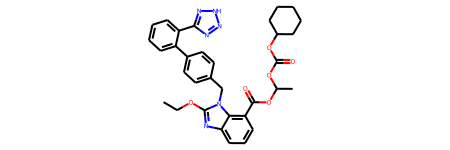

In [87]:
#print(molstruct)

subelements = ['[OH]', '[NH]','[NH2]']
remlist = []

for i in range(0, len(molstruct)):
    b =()
    j = 0
    a = molstruct.iloc[i]['SMILES']
    #print (i,a)
    m = Chem.MolFromSmiles(a)
    molmw = Chem.Descriptors.MolWt(m)
    while len(b) == 0 and j < len(subelements):
        substructure = Chem.MolFromSmarts(subelements[j])
        m.GetSubstructMatches(substructure)
        b = m.GetSubstructMatches(substructure)
        j = j+1
    if len(b) > 0 and molmw <=600:
        print(i, j, a, b, molmw)
    else:
        remlist.append(i)
        
print(remlist)
        
m

In [89]:
#a =mols2grid.selection.keys()

#print(a[0])
#a =[]
#for i in mols2grid.selection.keys():
    #print(i)
#    a.append(i)
    
#print(a)

#b= molstruct.reset_index()

#print(b)

#moldf = molstruct.iloc[remlist]
a = molstruct[['ID','SMILES']]
moldf= a.drop(remlist)
print(moldf)


mols2grid.display(moldf,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=30,
                  # rename fields for the output document
                  subset=['ID', 'img'],
                  tooltip=['SMILES'],
                  MolDrawingOptions=opts,
                  hover_color = 'blue',
                  n_cols = 6
                )

                ID                                             SMILES
0        CHEMBL121            CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1
1        CHEMBL595            CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
2    CHEMBL1171837  Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...
3    CHEMBL1173655  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...
6    CHEMBL1229517  CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...
..             ...                                                ...
252  CHEMBL1094636      NC(=O)c1cccc2cn(-c3ccc([C@@H]4CCCNC4)cc3)nc12
253  CHEMBL1173055          CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1
256    CHEMBL44354  CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...
257    CHEMBL44657  COc1cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]...
258       CHEMBL61  COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...

[191 rows x 2 columns]


In [34]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)N')
print(m.GetSubstructMatches(substructure))

()


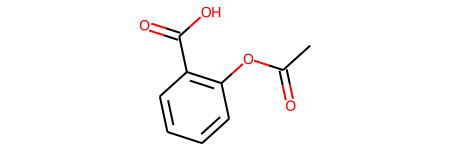

In [35]:
m